# Assess the impacts of different numbers of MAGMA top-ranking genes on scDRS results
1. Cell-level changes
2. Cell-type level changes

## 0. Set Up

In [1]:
exp_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="white",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="white", 
                 "M-2: MERTK+ S100A8+"="white", 
                 "M-3: MERTK+ HBEGF+"="white", 
                 "M-4: SPP1+"="white", 
                 "M-5: C1QA+"="white",
                 "M-6: STAT1+ CXCL10+"="white", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="white", 
                 "M-8: PLCG2+"="white", 
                 "M-9: DC3"="#5ab4ac", 
                 "M-10: DC2"="white", 
                 "M-11: CD16+/DC4"="#5ab4ac", 
                 "M-12: DC1"="white",
                 "M-13: pDC"="white", 
                 "M-14: LAMP3+"="white")
exp_fib <- c('F-0: PRG4+ CLIC5+ lining'='white',
                   'F-1: PRG4+ lining'='white', 
                   'F-2: CD34+ sublining'='white', 
                   'F-3: POSTN+ sublining'='white', 
                   'F-4: DKK3+ sublining'='white', 
                   'F-5: CD74-hi sublining'='white', 
                   'F-6: CXCL12+ SFRP1+ sublining'='white', 
                   'F-7: NOTCH3+ sublining'='white', 
                   'F-8: RSPO3+ intermediate'='white', 
                   'Mu-0: Mural'='white')

exp_b <- c("B-0: CD24+CD27+CD11b+\n switched memory" = "white", 
                   "B-1: CD24++CD27+IgM+\n unswitched memory" = "#5ab4ac", 
                   "B-2: IgM+IgD+TCL1A+ naive" = "#5ab4ac", 
                   "B-3: IgM+IgD+CD1c+ MZ-like" = "white",
                   "B-4: AICDA+BCL6+ GC-like" = "white",
                   "B-5: CD11c+LAMP1+ ABC" = "white",
                   "B-6: IgM+ plasma" = "white", 
                   "B-7: HLA-DR+IgG+ plasmablast" = "grey80",
                   "B-8: IgG1+IgG3+ plasma" = "white"
                   )

exp_t <- c("T-0: CD4+ IL7R+ memory" = "white", "T-1: CD4+ CD161+ memory" = "white", 
                 "T-2: CD4+ IL7R+CCR5+ memory" = "white", "T-3: CD4+ Tfh/Tph" = "white", 
                 "T-4: CD4+ naive" = "white", "T-5: CD4+ GZMK+ memory" = "white", 
                 "T-6: CD4+ memory" = "white", "T-7: CD4+ Tph" = "white", 
                 "T-8: CD4+ CD25-high Treg" = "white", "T-9: CD4+ CD25-low Treg" = "white", 
                 "T-10: CD4+ OX40+NR3C1+" = "white", "T-11: CD4+ CD146+ memory" = "white", 
                 "T-12: CD4+ GNLY+" = "white", "T-13: CD8+ GZMK/B+ memory" = "white", 
                 "T-14: CD8+ GZMK+ memory" = "white", "T-15: CD8+ GZMB+/TEMRA" = "white",
                 "T-16: CD8+ CD45ROlow/naive" = "white", "T-17: CD8+ activated/NK-like" = "white",
                 "T-18: Proliferating" = "white", "T-19: MT-high (low quality)" = "#5ab4ac", 
                 "T-20: CD38+" = "grey80", "T-21: Innate-like" = "white", 
                 "T-22: Vdelta1" = "#5ab4ac", "T-23: Vdelta2" = "#5ab4ac")

exp_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#5ab4ac", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "white", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#01665e",
                    "NK-3: CD56dim CD16+ GZMB-" = "#5ab4ac", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "#5ab4ac", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#01665e", 
                    "NK-6: CD56bright CD16- GNLY+" = "#5ab4ac", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "white", 
                    "NK-8: CD56bright CD16- IFN response" = "white",
                    "NK-9: MT-high" = "grey", 
                    "NK-10: PCNA+ Proliferating" = "grey80",
                    "NK-11: MKI67+ Proliferating" = "#5ab4ac", 
                    "NK-12: IL7R+ ILC" = "#5ab4ac", 
                    "NK-13: IL7R+CD161+ ILC" = "#5ab4ac")

exp_end <- c("E-0: SPARC+ capillary" = "white", 
                     "E-1: LIFR+ venular" = "white",
                     "E-2: ICAM1+ venular" = "white", 
                     "E-3: NOTCH4+ arteriolar" = "white", 
                     "E-4: Lymphatic" = "#5ab4ac")

meta_colors <- c(exp_t, exp_nk, 
                 exp_mac, exp_b,
                exp_fib, exp_end)

In [21]:

exp_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="white",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="white", 
                 "M-2: MERTK+ S100A8+"="#5ab4ac", 
                 "M-3: MERTK+ HBEGF+"="white", 
                 "M-4: SPP1+"="#5ab4ac", 
                 "M-5: C1QA+"="grey80",
                 "M-6: STAT1+ CXCL10+"="#01665e", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="grey80", 
                 "M-8: PLCG2+"="white", 
                 "M-9: DC3"="#01665e", 
                 "M-10: DC2"="#01665e", 
                 "M-11: CD16+/DC4"="#01665e", 
                 "M-12: DC1"="#01665e",
                 "M-13: pDC"="white", 
                 "M-14: LAMP3+"="grey80")
exp_fib <- c('F-0: PRG4+ CLIC5+ lining'='grey80',
                   'F-1: PRG4+ lining'='white', 
                   'F-2: CD34+ sublining'='white', 
                   'F-3: POSTN+ sublining'='white', 
                   'F-4: DKK3+ sublining'='white', 
                   'F-5: CD74-hi sublining'='grey80', 
                   'F-6: CXCL12+ SFRP1+ sublining'='white', 
                   'F-7: NOTCH3+ sublining'='grey80', 
                   'F-8: RSPO3+ intermediate'='white', 
                   'Mu-0: Mural'='white')
# #01665e both
# #5ab4ac sig
exp_b <- c("B-0: CD24+CD27+CD11b+\n switched memory" = "#01665e", 
                   "B-1: CD24++CD27+IgM+\n unswitched memory" = "#5ab4ac", 
                   "B-2: IgM+IgD+TCL1A+ naive" = "#01665e", 
                   "B-3: IgM+IgD+CD1c+ MZ-like" = "#01665e",
                   "B-4: AICDA+BCL6+ GC-like" = "#01665e",
                   "B-5: CD11c+LAMP1+ ABC" = "#01665e",
                   "B-6: IgM+ plasma" = "white", 
                   "B-7: HLA-DR+IgG+ plasmablast" = "#01665e",
                   "B-8: IgG1+IgG3+ plasma" = "white"
                   )

exp_t <- c("T-0: CD4+ IL7R+ memory" = "white", "T-1: CD4+ CD161+ memory" = "white", 
                 "T-2: CD4+ IL7R+CCR5+ memory" = "white", "T-3: CD4+ Tfh/Tph" = "white", 
                 "T-4: CD4+ naive" = "white", "T-5: CD4+ GZMK+ memory" = "white", 
                 "T-6: CD4+ memory" = "white", "T-7: CD4+ Tph" = "white", 
                 "T-8: CD4+ CD25-high Treg" = "white", "T-9: CD4+ CD25-low Treg" = "white", 
                 "T-10: CD4+ OX40+NR3C1+" = "white", "T-11: CD4+ CD146+ memory" = "white", 
                 "T-12: CD4+ GNLY+" = "#5ab4ac", "T-13: CD8+ GZMK/B+ memory" = "white", 
                 "T-14: CD8+ GZMK+ memory" = "#5ab4ac", "T-15: CD8+ GZMB+/TEMRA" = "#5ab4ac",
                 "T-16: CD8+ CD45ROlow/naive" = "white", "T-17: CD8+ activated/NK-like" = "#01665e",
                 "T-18: Proliferating" = "white", "T-19: MT-high (low quality)" = "white", 
                 "T-20: CD38+" = "white", "T-21: Innate-like" = "white", 
                 "T-22: Vdelta1" = "#5ab4ac", "T-23: Vdelta2" = "#01665e")



exp_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#01665e", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "#01665e", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#01665e",
                    "NK-3: CD56dim CD16+ GZMB-" = "#01665e", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "white", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#01665e", 
                    "NK-6: CD56bright CD16- GNLY+" = "white", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "#5ab4ac", 
                    "NK-8: CD56bright CD16- IFN response" = "white",
                    "NK-9: MT-high" = "grey80", 
                    "NK-10: PCNA+ Proliferating" = "#01665e",
                    "NK-11: MKI67+ Proliferating" = "grey80", 
                    "NK-12: IL7R+ ILC" = "grey80", 
                    "NK-13: IL7R+CD161+ ILC" = "#01665e")

exp_end <- c("E-0: SPARC+ capillary" = "white", 
                     "E-1: LIFR+ venular" = "white",
                     "E-2: ICAM1+ venular" = "white", 
                     "E-3: NOTCH4+ arteriolar" = "grey80", 
                     "E-4: Lymphatic" = "#01665e")

exp_colors_num <- c(exp_t, exp_nk, 
                 exp_mac, exp_b,
                exp_fib, exp_end)

In [2]:
exp_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#756bb1",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#756bb1", 
                 "M-2: MERTK+ S100A8+"="#756bb1", 
                 "M-3: MERTK+ HBEGF+"="#756bb1", 
                 "M-4: SPP1+"="#bcbddc", 
                 "M-5: C1QA+"="white",
                 "M-6: STAT1+ CXCL10+"="#756bb1", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#756bb1", 
                 "M-8: PLCG2+"="white", 
                 "M-9: DC3"="white", 
                 "M-10: DC2"="white", 
                 "M-11: CD16+/DC4"="white", 
                 "M-12: DC1"="white",
                 "M-13: pDC"="white", 
                 "M-14: LAMP3+"="white")
exp_fib <- c('F-0: PRG4+ CLIC5+ lining'='white',
                   'F-1: PRG4+ lining'='white', 
                   'F-2: CD34+ sublining'='#756bb1', 
                   'F-3: POSTN+ sublining'='white', 
                   'F-4: DKK3+ sublining'='white', 
                   'F-5: CD74-hi sublining'='white', 
                   'F-6: CXCL12+ SFRP1+ sublining'='white', 
                   'F-7: NOTCH3+ sublining'='#756bb1', 
                   'F-8: RSPO3+ intermediate'='white', 
                   'Mu-0: Mural'='white')

exp_b <- c("B-0: CD24+CD27+CD11b+\n switched memory" = "#756bb1", 
                   "B-1: CD24++CD27+IgM+\n unswitched memory" = "white", 
                   "B-2: IgM+IgD+TCL1A+ naive" = "white", 
                   "B-3: IgM+IgD+CD1c+ MZ-like" = "white",
                   "B-4: AICDA+BCL6+ GC-like" = "white",
                   "B-5: CD11c+LAMP1+ ABC" = "#756bb1",
                   "B-6: IgM+ plasma" = "white", 
                   "B-7: HLA-DR+IgG+ plasmablast" = "white",
                   "B-8: IgG1+IgG3+ plasma" = "white"
                   )

exp_t <- c("T-0: CD4+ IL7R+ memory" = "#bcbddc", "T-1: CD4+ CD161+ memory" = "#bcbddc", 
                 "T-2: CD4+ IL7R+CCR5+ memory" = "#bcbddc", "T-3: CD4+ Tfh/Tph" = "#756bb1", 
                 "T-4: CD4+ naive" = "white", "T-5: CD4+ GZMK+ memory" = "#bcbddc", 
                 "T-6: CD4+ memory" = "#bcbddc", "T-7: CD4+ Tph" = "#756bb1", 
                 "T-8: CD4+ CD25-high Treg" = "#756bb1", "T-9: CD4+ CD25-low Treg" = "#756bb1", 
                 "T-10: CD4+ OX40+NR3C1+" = "white", "T-11: CD4+ CD146+ memory" = "#bcbddc", 
                 "T-12: CD4+ GNLY+" = "white", "T-13: CD8+ GZMK/B+ memory" = "#756bb1", 
                 "T-14: CD8+ GZMK+ memory" = "#756bb1", "T-15: CD8+ GZMB+/TEMRA" = "white",
                 "T-16: CD8+ CD45ROlow/naive" = "white", "T-17: CD8+ activated/NK-like" = "white",
                 "T-18: Proliferating" = "white", "T-19: MT-high (low quality)" = "white", 
                 "T-20: CD38+" = "white", "T-21: Innate-like" = "white", 
                 "T-22: Vdelta1" = "white", "T-23: Vdelta2" = "white")

exp_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#bcbddc", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "#bcbddc", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#bcbddc",
                    "NK-3: CD56dim CD16+ GZMB-" = "#bcbddc", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "#bcbddc", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#bcbddc", 
                    "NK-6: CD56bright CD16- GNLY+" = "#bcbddc", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "#bcbddc", 
                    "NK-8: CD56bright CD16- IFN response" = "#bcbddc",
                    "NK-9: MT-high" = "white", 
                    "NK-10: PCNA+ Proliferating" = "white",
                    "NK-11: MKI67+ Proliferating" = "white", 
                    "NK-12: IL7R+ ILC" = "white", 
                    "NK-13: IL7R+CD161+ ILC" = "white")

exp_end <- c("E-0: SPARC+ capillary" = "white", 
                     "E-1: LIFR+ venular" = "white",
                     "E-2: ICAM1+ venular" = "white", 
                     "E-3: NOTCH4+ arteriolar" = "white", 
                     "E-4: Lymphatic" = "white")

exp_colors_ra <- c(exp_t, exp_nk, 
                 exp_mac, exp_b,
                exp_fib, exp_end)

In [3]:

meta_colors1 <- list(exp_end, exp_fib, 
                     exp_b, exp_mac,
                     exp_nk, exp_t)

In [33]:
install.packages("GGally")

also installing the dependencies ‘vroom’, ‘tzdb’, ‘readr’, ‘haven’, ‘cards’, ‘labelled’, ‘broom.helpers’, ‘forcats’, ‘ggstats’





The downloaded binary packages are in
	/var/folders/dp/zmpkfc9n3yld16sv5nhc1x5c0000gn/T//RtmpXaobIg/downloaded_packages


In [4]:
library(data.table)
#library(tidyverse)
#library("EnsDb.Hsapiens.v86")
#library(reshape2)
library(R.utils)
library(UpSetR)
library(grid)
library(cowplot)
library(ggnewscale)
library(GGally)

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.26.0 (2024-01-24 05:12:50 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.3 (2023-11-18 01:00:02 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, use, warnings


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following

## 1. Graph individual cell score comparisons

In [40]:
indir = "~/Desktop/SCRNA-GWAS-Benchmarking/output/scDRS_GeneNum/"
cell_2000 = fread(paste0(indir, "RA_2000.score.gz"))
cell_1500 = fread(paste0(indir, "RA_1500.score.gz"))
cell_1000 = fread("/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/RA_53/RA.score.gz")

cell_500 = fread(paste0(indir, "RA_500.score.gz"))
cell_300 = fread(paste0(indir, "RA_300.score.gz"))
cell_100 = fread(paste0(indir, "RA_100.score.gz"))
cell_2000[1:2,]
cell_1000[1:2,]
cell_300[1:2,]

V1,raw_score,norm_score,mc_pval,pval,nlog10_pval,zscore
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BRI-401_AAGACTCCATTATGCG,0.08254773,0.5821152,0.2678661,0.2752621,0.5602536,0.5969747
BRI-401_ACACAGTGTAACACGG,0.07567680,-0.6585767,0.7426287,0.7418236,0.1296994,-0.6489776


V1,raw_score,norm_score,mc_pval,pval,nlog10_pval,zscore
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BRI-401_AAGACTCCATTATGCG,0.08435727,0.3737726,0.3246753,0.3448862,0.4623242,0.3991640
BRI-401_ACACAGTGTAACACGG,0.07990883,-0.1678585,0.5634366,0.5562323,0.2547438,-0.1414235


V1,raw_score,norm_score,mc_pval,pval,nlog10_pval,zscore
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BRI-401_AAGACTCCATTATGCG,0.09270286,0.03917581,0.448505,0.4664965,0.331151570,0.08407968
BRI-401_ACACAGTGTAACACGG,0.06577315,-1.90166100,0.986711,0.9788248,0.009295046,-2.03005980


In [41]:
# make sure in teh same order
identical(cell_2000$V1, cell_1500$V1)
identical(cell_1000$V1, cell_500$V1)
identical(cell_300$V1, cell_100$V1)
identical(cell_300$V1, cell_500$V1)
identical(cell_500$V1, cell_1500$V1)

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [42]:
data <- data.frame(
  "N2000" = cell_2000$zscore,
  "N1500" = cell_1500$zscore,
  "N1000" = cell_1000$zscore, 
  "N500" = cell_500$zscore, 
    "N300" = cell_300$zscore, 
  "N100" = cell_100$zscore
)
rownames(data) = cell_300$V1
#data
cor(data, method = "pearson")

,N2000,N1500,N1000,N500,N300,N100
N2000,1.0000000,0.9756598,0.9423330,0.8929795,0.8463788,0.7218497
N1500,0.9756598,1.0000000,0.9643191,0.9143666,0.8679431,0.7466832
N1000,0.9423330,0.9643191,1.0000000,0.9397980,0.8859761,0.7584067
N500,0.8929795,0.9143666,0.9397980,1.0000000,0.9415201,0.8093737
N300,0.8463788,0.8679431,0.8859761,0.9415201,1.0000000,0.8590136
N100,0.7218497,0.7466832,0.7584067,0.8093737,0.8590136,1.0000000


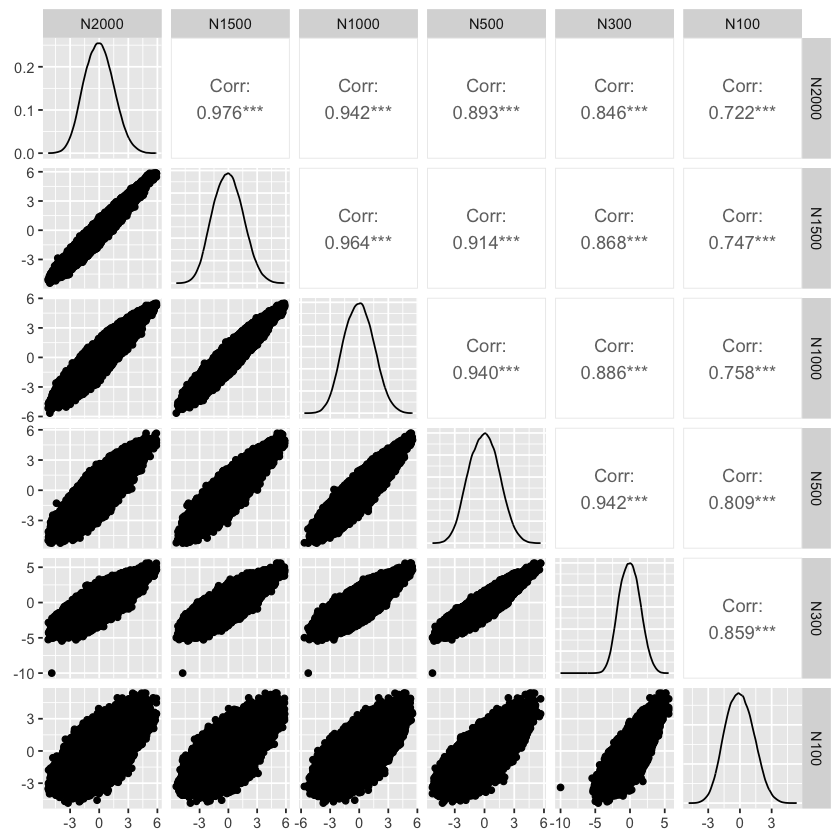

In [48]:
#options(repr.plot.height=, repr.plot.width=)
#options(repr.plot.height = 0.473098330241187*nrow(micro_0), repr.plot.width =11)
#png("./NGENE_corr_comp.pdf")
options(repr.plot.height=7, repr.plot.width=7)
ggpairs(data, 
        upper = list(continuous = wrap("cor", method = "pearson")),
        lower = list(continuous = "points"),
        diag = list(continuous = "densityDiag"))

#dev.off()

In [44]:
ggsave("./NGENE_corr_comp.png")

Saving 7 x 7 in image


In [36]:
# establish the outliers
data[1:2,]

data[data$N100 < -3 & data$N300 < -9,]



,N2000,N1500,N1000,N500,N300,N100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BRI-401_AAGACTCCATTATGCG,0.5969747,0.4924167,0.3991640,0.9052294,0.08407968,-1.127975
BRI-401_ACACAGTGTAACACGG,-0.6489776,-0.4763049,-0.1414235,-0.2137740,-2.03005980,-1.650007


,N2000,N1500,N1000,N500,N300,N100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BRI-566_GTCGTTCTCTTACGTT,-4.89216,-4.765588,-5.259238,-5.249796,-10,-3.39522


## 3. Graph Cluster Results

In [9]:
micro_100 = fread(paste0(indir, "RA_100.scdrs_group.cell_type"))
micro_300 = fread(paste0(indir, "RA_300.scdrs_group.cell_type"))
micro_500 = fread(paste0(indir, "RA_500.scdrs_group.cell_type"))
micro_1500 = fread(paste0(indir, "RA_1500.scdrs_group.cell_type"))
micro_2000 = fread(paste0(indir, "RA_2000.scdrs_group.cell_type"))
output_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/RA_53/"
micro_1000 <- fread(paste0(output_dir, "RA.scdrs_group.cell_type_micro"))

In [10]:
# calculate the proportion significant
micro_100$prop_sig <- (micro_100$n_fdr_0.05/micro_100$n_cell)*100
micro_300$prop_sig <- (micro_300$n_fdr_0.05/micro_300$n_cell)*100
micro_500$prop_sig <- (micro_500$n_fdr_0.05/micro_500$n_cell)*100
micro_1500$prop_sig <- (micro_1500$n_fdr_0.05/micro_1500$n_cell)*100
micro_2000$prop_sig <- (micro_2000$n_fdr_0.05/micro_2000$n_cell)*100
micro_1000$prop_sig <- (micro_1000$n_fdr_0.05/micro_1000$n_cell)*100

In [11]:
# add spaces to the B-cell clusters
add_spaces_dict <- c("B-0: CD24+CD27+CD11b+\n switched memory", 
                    "B-1: CD24++CD27+IgM+\n unswitched memory")
names(add_spaces_dict) <- c("B-0: CD24+CD27+CD11b+ switched memory", "B-1: CD24++CD27+IgM+ unswitched memory")
# micro_0$group2 <- as.character(micro_0$group)
# micro_5$group2 <- as.character(micro_5$group)
# micro_10$group2 <- as.character(micro_10$group)
# micro_5035$group2 <- as.character(micro_5035$group)
# micro_100$group2 <- as.character(micro_100$group)
for (cell_group in names(add_spaces_dict)) {
    micro_100[micro_100$group == cell_group,]$group <- add_spaces_dict[cell_group]
    micro_300[micro_300$group == cell_group,]$group <- add_spaces_dict[cell_group]
    micro_500[micro_500$group == cell_group,]$group <- add_spaces_dict[cell_group]
    micro_1000[micro_1000$group == cell_group,]$group <- add_spaces_dict[cell_group]
    micro_1500[micro_1500$group == cell_group,]$group <- add_spaces_dict[cell_group]
    micro_2000[micro_2000$group == cell_group,]$group <- add_spaces_dict[cell_group]
    }

In [12]:
# get ranked cell clusters according to 5035
ranked_cell_clusters <- c()
for (cell_type in meta_colors1) {
    # get the ranked cells in that group
    data <- micro_1000[micro_1000$group %in% names(cell_type),]
    data <- data[order(abs(assoc_mcz)),]
    # now add the ranked cells to a list
    ranked_cell_clusters <- c(ranked_cell_clusters, data$group)
    } 
ranked_cell_clusters

[1] "E-2: ICAM1+ venular"                     
 [2] "E-0: SPARC+ capillary"                   
 [3] "E-4: Lymphatic"                          
 [4] "E-3: NOTCH4+ arteriolar"                 
 [5] "E-1: LIFR+ venular"                      
 [6] "F-0: PRG4+ CLIC5+ lining"                
 [7] "F-1: PRG4+ lining"                       
 [8] "F-4: DKK3+ sublining"                    
 [9] "F-5: CD74-hi sublining"                  
[10] "Mu-0: Mural"                             
[11] "F-3: POSTN+ sublining"                   
[12] "F-7: NOTCH3+ sublining"                  
[13] "F-2: CD34+ sublining"                    
[14] "F-8: RSPO3+ intermediate"                
[15] "F-6: CXCL12+ SFRP1+ sublining"           
[16] "B-7: HLA-DR+IgG+ plasmablast"            
[17] "B-8: IgG1+IgG3+ plasma"                  
[18] "B-6: IgM+ plasma"                        
[19] "B-1: CD24++CD27+IgM+\n unswitched memory"
[20] "B-2: IgM+IgD+TCL1A+ naive"               
[21] "B-0: CD24+CD27+CD11b+\n switched memory" 
[22] "B-3: IgM+IgD+CD1c+ MZ-like"              
[23] "B-4: AICDA+BCL6+ GC-like"                
[24] "B-5: CD11c+LAMP1+ ABC"                   
[25] "M-5: C1QA+"                              
[26] "M-7: IL1B+ FCN1+ HBEGF+"                 
[27] "M-8: PLCG2+"                             
[28] "M-13: pDC"                               
[29] "M-11: CD16+/DC4"                         
[30] "M-6: STAT1+ CXCL10+"                     
[31] "M-9: DC3"                                
[32] "M-10: DC2"                               
[33] "M-4: SPP1+"                              
[34] "M-2: MERTK+ S100A8+"                     
[35] "M-12: DC1"                               
[36] "M-3: MERTK+ HBEGF+"                      
[37] "M-14: LAMP3+"                            
[38] "M-0: MERTK+ SELENOP+ LYVE1+"             
[39] "M-1: MERTK+ SELENOP+ LYVE1-"             
[40] "NK-8: CD56bright CD16- IFN response"     
[41] "NK-4: CD56bright CD16- GZMA+CD160+"      
[42] "NK-6: CD56bright CD16- GNLY+"            
[43] "NK-9: MT-high"                           
[44] "NK-11: MKI67+ Proliferating"             
[45] "NK-3: CD56dim CD16+ GZMB-"               
[46] "NK-12: IL7R+ ILC"                        
[47] "NK-5: CD56bright CD16- GZMA+CD69+"       
[48] "NK-0: CD56dim CD16+ IFNG-"               
[49] "NK-13: IL7R+CD161+ ILC"                  
[50] "NK-7: CD56bright CD16- GNLY+CD69+"       
[51] "NK-2: CD56dim CD16+ IFNG+CD160-"         
[52] "NK-1: CD56dim CD16+ IFNG+CD160+"         
[53] "NK-10: PCNA+ Proliferating"              
[54] "T-22: Vdelta1"                           
[55] "T-23: Vdelta2"                           
[56] "T-19: MT-high (low quality)"             
[57] "T-15: CD8+ GZMB+/TEMRA"                  
[58] "T-16: CD8+ CD45ROlow/naive"              
[59] "T-12: CD4+ GNLY+"                        
[60] "T-21: Innate-like"                       
[61] "T-14: CD8+ GZMK+ memory"                 
[62] "T-17: CD8+ activated/NK-like"            
[63] "T-4: CD4+ naive"                         
[64] "T-5: CD4+ GZMK+ memory"                  
[65] "T-13: CD8+ GZMK/B+ memory"               
[66] "T-0: CD4+ IL7R+ memory"                  
[67] "T-2: CD4+ IL7R+CCR5+ memory"             
[68] "T-1: CD4+ CD161+ memory"                 
[69] "T-9: CD4+ CD25-low Treg"                 
[70] "T-6: CD4+ memory"                        
[71] "T-3: CD4+ Tfh/Tph"                       
[72] "T-18: Proliferating"                     
[73] "T-10: CD4+ OX40+NR3C1+"                  
[74] "T-7: CD4+ Tph"                           
[75] "T-11: CD4+ CD146+ memory"                
[76] "T-20: CD38+"                             
[77] "T-8: CD4+ CD25-high Treg"

In [13]:
length(setdiff(ranked_cell_clusters, micro_2000$group))
length(setdiff(micro_2000$group, ranked_cell_clusters))
length(setdiff(names(exp_colors_ra), ranked_cell_clusters))
length(setdiff(ranked_cell_clusters, names(exp_colors_ra)))
length(setdiff(names(meta_colors1), ranked_cell_clusters))
length(setdiff(ranked_cell_clusters, names(meta_colors1)))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 77

In [14]:
exp_colors_ra[1:2]
ranked_cell_clusters[1:2]
meta_colors1[1:2]

T-0: CD4+ IL7R+ memory T-1: CD4+ CD161+ memory 
              "#bcbddc"               "#bcbddc"

[1] "E-2: ICAM1+ venular"   "E-0: SPARC+ capillary"

[[1]]
  E-0: SPARC+ capillary      E-1: LIFR+ venular     E-2: ICAM1+ venular 
                "white"                 "white"                 "white" 
E-3: NOTCH4+ arteriolar          E-4: Lymphatic 
                "white"                 "white" 

[[2]]
     F-0: PRG4+ CLIC5+ lining             F-1: PRG4+ lining 
                      "white"                       "white" 
         F-2: CD34+ sublining         F-3: POSTN+ sublining 
                    "#756bb1"                       "white" 
         F-4: DKK3+ sublining        F-5: CD74-hi sublining 
                      "white"                       "white" 
F-6: CXCL12+ SFRP1+ sublining        F-7: NOTCH3+ sublining 
                      "white"                     "#756bb1" 
     F-8: RSPO3+ intermediate                   Mu-0: Mural 
                      "white"                       "white"

In [15]:
colnames(micro_100)
setdiff(micro_100$group, ranked_cell_clusters)
micro_100[1:2,]

[1] "group"      "n_cell"     "n_ctrl"     "assoc_mcp"  "assoc_mcz" 
 [6] "hetero_mcp" "hetero_mcz" "n_fdr_0.05" "n_fdr_0.1"  "n_fdr_0.2" 
[11] "prop_sig"

character(0)

group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2,prop_sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B-0: CD24+CD27+CD11b+ switched memory,5606,100,0.3960396,0.1777633,0.2178218,0.7830806,0,2,19,0
B-1: CD24++CD27+IgM+ unswitched memory,2958,100,0.3861386,0.2128391,0.3366337,0.1429722,0,2,17,0


In [26]:
library(ggplot2)
library(ggnewscale)
options(repr.plot.height = 0.473098330241187*nrow(micro_1000), repr.plot.width =11)

p1 <- ggplot(micro_100) + 
  # First layer: discrete fill
  geom_tile(aes(x=0, y=factor(group, levels=ranked_cell_clusters), fill=factor(group, levels=ranked_cell_clusters))) +
  scale_fill_manual(values=exp_colors_ra) + 
  new_scale("fill") + 
  
  # Second layer: another discrete fill
  geom_tile(aes(x=0.15, y=factor(group, levels=ranked_cell_clusters), fill=factor(group, levels=ranked_cell_clusters))) +
  scale_fill_manual(values=meta_colors) + 
  new_scale("fill") + 

    # Second layer: another discrete fill
  geom_tile(aes(x=0.3, y=factor(group, levels=ranked_cell_clusters), fill=factor(group, levels=ranked_cell_clusters))) +
  scale_fill_manual(values=exp_colors_num) + 
  new_scale("fill") +
  
  # Third layer: continuous fill
  geom_tile(aes(fill=assoc_mcz, x=0.45, y=group )) + 
  scale_fill_gradient2(low="cornflowerblue", mid="white", high="red", midpoint=0) +
  
  # Points
  geom_point(data = micro_100[micro_100$assoc_mcp < 0.05,], 
             aes(x=0.03, y=factor(group, levels=ranked_cell_clusters)), size=7, color='black', shape=0) + 
  geom_point(data = micro_100[micro_100$hetero_mcp < 0.05,], 
             aes(x=0.03, y=factor(group, levels=ranked_cell_clusters)), size=7, color='black', shape=4) +

# N300
geom_tile(data=micro_300, aes(x=0.6, y=factor(group, levels=ranked_cell_clusters), fill=assoc_mcz)) + 
     geom_point(data = micro_300[micro_300$assoc_mcp < 0.05,], aes(x=0.1825, y=group), size=7, color='black', shape=0) + 
    geom_point(data = micro_300[micro_300$hetero_mcp < 0.05,], aes(x=0.1825, y=group), size=7, color='black', shape=4) +

# N500
geom_tile(data=micro_500, aes(x=0.75, y=factor(group, levels=ranked_cell_clusters), fill=assoc_mcz)) + 
     geom_point(data = micro_500[micro_500$assoc_mcp < 0.05,], aes(x=0.335, y=group), size=7, color='black', shape=0) + 
    geom_point(data = micro_500[micro_500$hetero_mcp < 0.05,], aes(x=0.335, y=group), size=7, color='black', shape=4) +
# N1000
geom_tile(data=micro_1000, aes(x=0.9, y=factor(group, levels=ranked_cell_clusters), fill=assoc_mcz)) + 
     geom_point(data = micro_1000[micro_1000$assoc_mcp < 0.05,], aes(x=0.4875, y=group), size=7, color='black', shape=0) + 
    geom_point(data = micro_1000[micro_1000$hetero_mcp < 0.05,], aes(x=0.4875, y=group), size=7, color='black', shape=4) +
# N1500
geom_tile(data=micro_1500, aes(x=1.05, y=factor(group, levels=ranked_cell_clusters), fill=assoc_mcz)) + 
     geom_point(data = micro_1500[micro_1500$assoc_mcp < 0.05,], aes(x=0.64, y=group), size=7, color='black', shape=0) + 
    geom_point(data = micro_1500[micro_1500$hetero_mcp < 0.05,], aes(x=0.64, y=group), size=7, color='black', shape=4) +
# N2000
geom_tile(data=micro_2000, aes(x=1.2, y=factor(group, levels=ranked_cell_clusters), fill=assoc_mcz)) + 
     geom_point(data = micro_2000[micro_2000$assoc_mcp < 0.05,], aes(x=0.7925, y=group), size=7, color='black', shape=0) + 
    geom_point(data = micro_2000[micro_2000$hetero_mcp < 0.05,], aes(x=0.7925, y=group), size=7, color='black', shape=4) +
    geom_vline(xintercept=-0.35) + geom_vline(xintercept=-0.5) +geom_vline(xintercept=-0.2) +
    geom_vline(xintercept=-0.05) +geom_vline(xintercept=0.105) + geom_vline(xintercept=0.255) + geom_vline(xintercept=0.405) + 
geom_vline(xintercept=0.557) + geom_vline(xintercept=0.708) + geom_vline(xintercept=0.86) + 
  
  # Theme settings
theme_classic(base_size =17.5) + 
  theme(legend.position="none", 
        axis.text.x = element_blank(),
        axis.title.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        axis.ticks.x = element_blank(), 
        axis.title.x = element_blank())


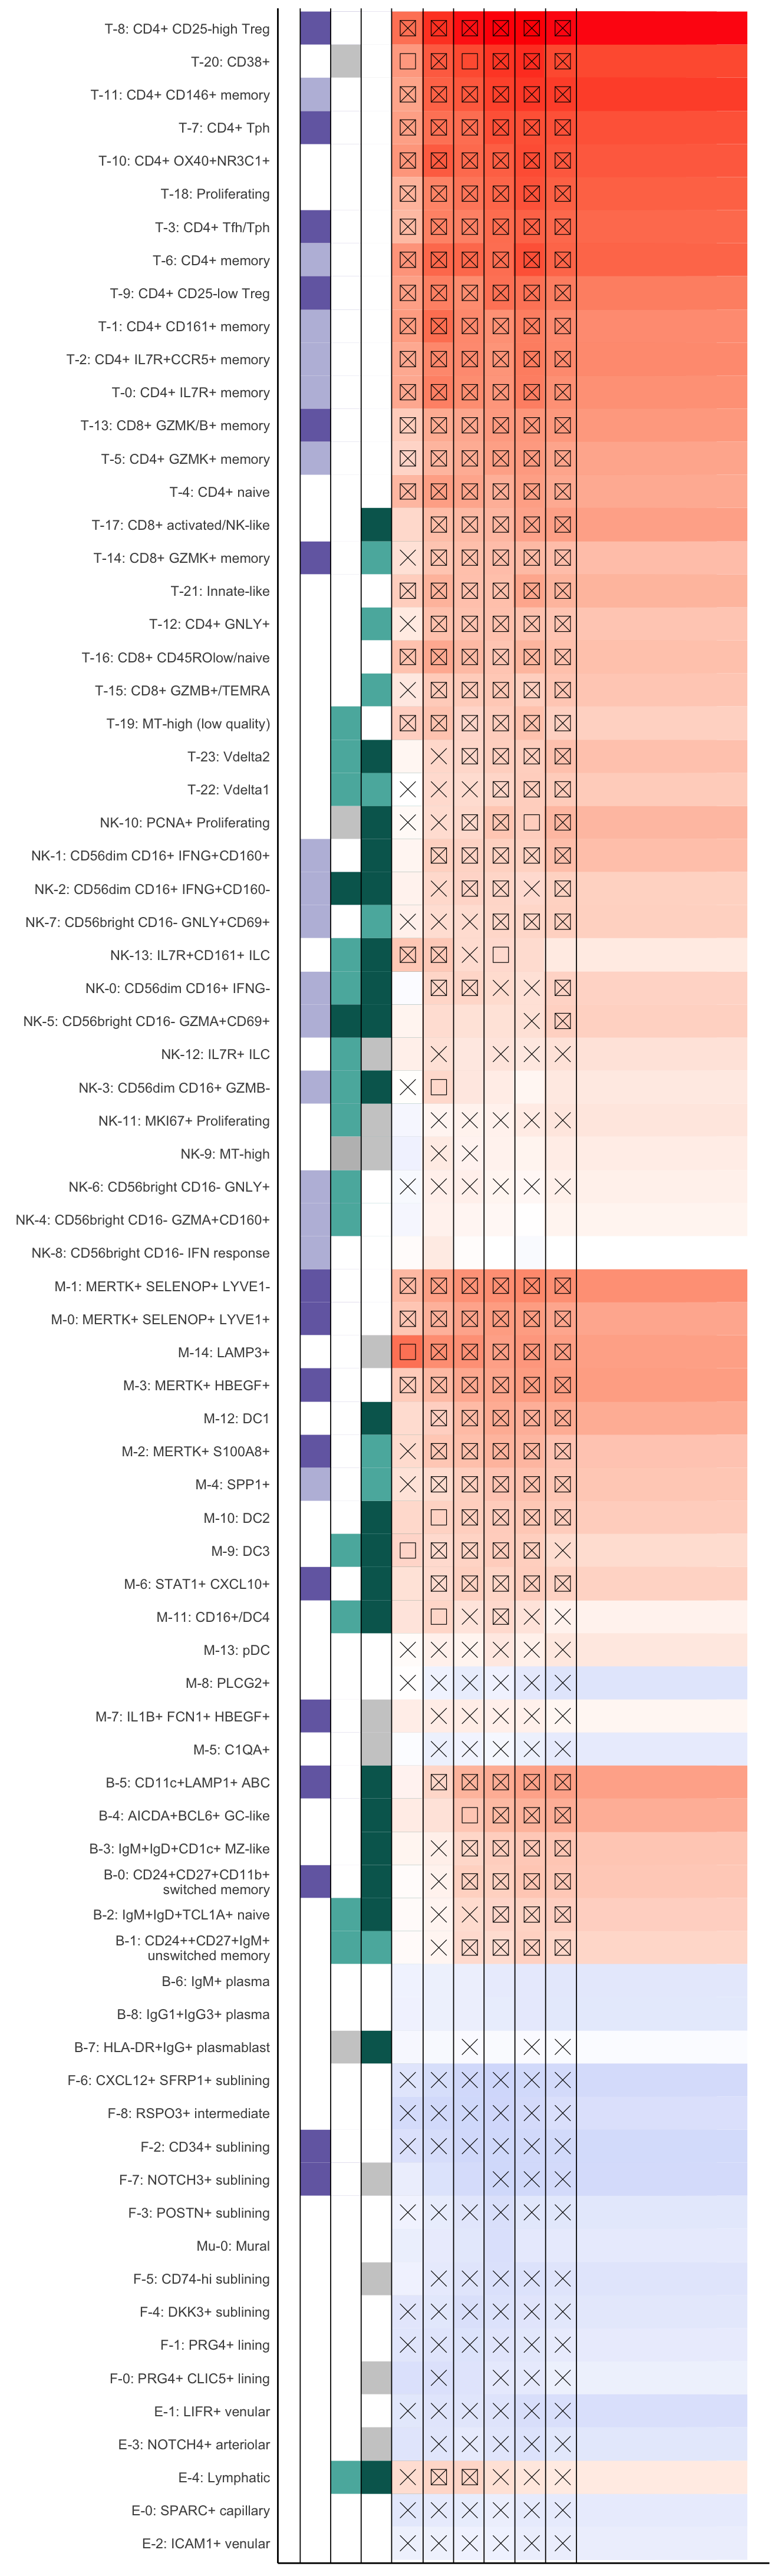

In [45]:
p1

In [47]:
#options(repr.plot.height = 0.473098330241187*nrow(micro_0), repr.plot.width =11)
pdf("./NGENE_comp.pdf", width=11, height=0.473098330241187*nrow(micro_100))
print(p1)
dev.off()

pdf 
  2